In [42]:
import os

## getcwd stands for 'get current working directory'
current_dir = os.getcwd()

print(current_dir) 

C:\Users\KerrF\Documents\Adam\School\GMU\GGS416\w4


In [43]:
current_dir = os.getcwd()

## adding the shaoe file to the path
path = current_dir + '/polygon1.shp'

print(path)  

C:\Users\KerrF\Documents\Adam\School\GMU\GGS416\w4/polygon1.shp


In [44]:
import geopandas as gpd

# import geopandas and loading the file as the variable named dulles
dulles = gpd.read_file(path, crs='epsg:4326')
print(dulles)

   FID                                           geometry
0    0  POLYGON ((-77.50000 38.98000, -77.40000 38.980...


In [45]:
# The previous crs is in decimel degrees (epsg:4326), changing to meters ('epsg:3857')
dulles = dulles.to_crs('epsg:3857')
print(dulles)

   FID                                           geometry
0    0  POLYGON ((-8627260.536 4718807.149, -8616128.5...


In [46]:
# Due to the current crs, the area will be in square meters
dulles['area'] = dulles['geometry'].area 
print(dulles)

   FID                                           geometry          area
0    0  POLYGON ((-8627260.536 4718807.149, -8616128.5...  1.274565e+08


<AxesSubplot:>

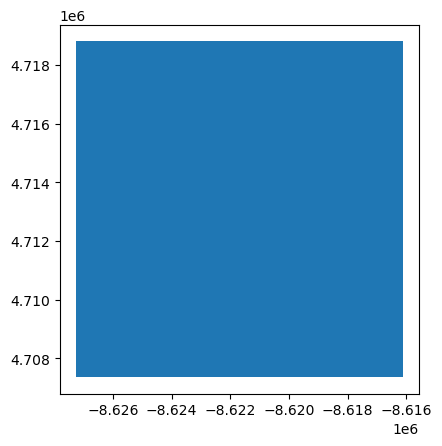

In [52]:
## checking to see what it looks like
dulles.plot() 

In [60]:
## diving by 10^6 to convert to km2
dulles['area_km2'] = dulles['area'] / 1e6
print(dulles['area_km2'])


0    127.456505
Name: area_km2, dtype: float64


In [62]:
## checking full dataframe structure
print(dulles)

   FID                                           geometry          area  \
0    0  POLYGON ((-8627260.536 4718807.149, -8616128.5...  1.274565e+08   

     area_km2  
0  127.456505  


In [63]:
## looping to show rows

for row in dulles.iterrows():
    print(row)

(0, FID                                                         0
geometry    POLYGON ((-8627260.536478702 4718807.14895028,...
area                                         127456505.358023
area_km2                                           127.456505
Name: 0, dtype: object)


In [64]:
for row in dulles.iterrows():
    
    ##this will print our row index
    print(row[0]) 
    print('')
    print('')
    ##this will print our row information
    print(row[1])

0


FID                                                         0
geometry    POLYGON ((-8627260.536478702 4718807.14895028,...
area                                         127456505.358023
area_km2                                           127.456505
Name: 0, dtype: object


In [65]:
for row in dulles.iterrows():
    
    ##this will print our row geometry
    print(row)

(0, FID                                                         0
geometry    POLYGON ((-8627260.536478702 4718807.14895028,...
area                                         127456505.358023
area_km2                                           127.456505
Name: 0, dtype: object)


In [95]:
for row in dulles.iterrows():
    
    ## print the row geometry
    area_km2 = (row[1]['geometry'].area / 1e6)
    
    ## rounding area to 1 decimal place
    area_km2 = round(area_km2, 1)
       
    ## print the boundaries of the polygon and write out the area of airport
    bounds = dulles.bounds
    print(bounds)
    print('')
    print("The area of Dulles Airport is {} square kilometers".format(area_km2))

           minx          miny          maxx          maxy
0 -8.627261e+06  4.707358e+06 -8.616129e+06  4.718807e+06

The area of Dulles Airport is 127.5 square kilometers


In [82]:
## shows max and min of polygon in x and y
bounds = dulles.bounds
print(bounds)

           minx          miny          maxx          maxy
0 -8.627261e+06  4.707358e+06 -8.616129e+06  4.718807e+06


In [96]:
## set exterior coordinates
exterior = [(-8.627261e+06, 4.707358e+06), (-8.627261e+06, 4.718807e+06), (-8.616129e+06, 4.718807e+06), 
            (-8.616129e+06, 4.707358e+06), (-8.627261e+06, 4.707358e+06)]

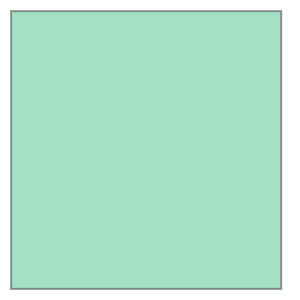

In [105]:
## import polygon with the exterior coordinates
from shapely.geometry import Polygon 
polyD = Polygon([(-8.627261e+06, 4.707358e+06), (-8.627261e+06, 4.718807e+06), (-8.616129e+06, 4.718807e+06), 
            (-8.616129e+06, 4.707358e+06), (-8.627261e+06, 4.707358e+06)])
polyD ## confirm it is working

In [112]:
#a list of exterior coordinate tuples
list(polyD.exterior.coords) 

[(-8627261.0, 4707358.0),
 (-8627261.0, 4718807.0),
 (-8616129.0, 4718807.0),
 (-8616129.0, 4707358.0),
 (-8627261.0, 4707358.0)]

In [109]:
# confirm polygon type is working
polyD.geom_type

'Polygon'